## Connect Libraries

In [5]:
import pandas as pd
import tweepy

## Authorization

In [1]:
consumer_key = "API_key"
consumer_secret = "API_secret_key"
access_key = "Access_token"
access_secret = "Access_token_secret"

# authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

## Data Receiving Test

In [2]:
screen_name = 'realDonaldTrump'
alltweets = []
tweets = api.user_timeline(screen_name=screen_name, count=100, tweet_mode='extended')
alltweets.extend(tweets)

In [7]:
outtweets = [[tweet.id_str, tweet.created_at, tweet.full_text] for tweet in alltweets]
df_outtweets = pd.DataFrame(outtweets, columns=['id', 'created_at', 'text'])
df_outtweets.head(10)

,id,created_at,text
0,1180667198093824001,2019-10-06 02:12:50,https://t.co/uElgSLSoJ8
1,1180664424375435265,2019-10-06 02:01:49,https://t.co/UBsZoZb20g
2,1180664060603518976,2019-10-06 02:00:22,https://t.co/F84WZ5LveS
3,1180653341539483650,2019-10-06 01:17:46,The first so-called second hand information “W...
4,1180631325683982336,2019-10-05 23:50:17,“President Trump would be negligent if he did ...
5,1180628130941345798,2019-10-05 23:37:36,Schiff and the Do Nothing Dems have lost all c...
6,1180624940212641793,2019-10-05 23:24:55,"Mitt, get off the stage, you’ve had your turn ..."
7,1180613975572135943,2019-10-05 22:41:21,RT @realDonaldTrump: So Crooked Hillary Clinto...
8,1180576872658280453,2019-10-05 20:13:55,RT @RepMarkMeadows: This is real reason why Wa...
9,1180576805893230592,2019-10-05 20:13:39,RT @SteveScalise: Proven liar Adam Schiff is r...


## Import Data from File

In [8]:
screen_name = 'realDonaldTrump'
data = pd.read_csv(f'/home/john/git/twitter_analytics/{screen_name}_tweets.csv')
data.head(10)

,id,created_at,text
0,1176819645699043328,2019-09-25 11:24:02,There has been no President in the history of ...
1,1176817132782411776,2019-09-25 11:14:03,Great new book by the brilliant Andrew McCarth...
2,1176703309488562178,2019-09-25 03:41:45,Thank you @LouDobbs and @JudgeJeanine! https:/...
3,1176702213613334535,2019-09-25 03:37:24,Thank you @kevinomccarthy! https://t.co/DhcGpW...
4,1176701564624543744,2019-09-25 03:34:49,“He (Trump) has already been suffering from th...
5,1176697246680780800,2019-09-25 03:17:40,Sooooo true @LindseyGrahamSC! https://t.co/ZzF...
6,1176693927015002113,2019-09-25 03:04:28,Thank you @JennaEllisRives -- totally agree! h...
7,1176691762934484994,2019-09-25 02:55:52,"""They (Dems) are scrambling for a theme and na..."
8,1176686526006276097,2019-09-25 02:35:04,"“Mark Levin: Media trying to protect Biden, ig..."
9,1176684407677210624,2019-09-25 02:26:39,“Attorney For Anti-Trump ‘Whistleblower’ Worke...


### Get basic data info

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 3 columns):
id            1199 non-null int64
created_at    1199 non-null object
text          1199 non-null object
dtypes: int64(1), object(2)
memory usage: 28.2+ KB


#### Convert created_at column to appropriate format

In [10]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['date'] = pd.to_datetime(data['created_at'].dt.date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 4 columns):
id            1199 non-null int64
created_at    1199 non-null datetime64[ns]
text          1199 non-null object
date          1199 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 37.5+ KB


## Visualization - Tweets Day by Day

In [12]:
import plotly.express as px

df_tweets = data.copy()[~data['text'].str.startswith('RT')]  # exclude RE-tweets from data
df = df_tweets.groupby(['date']).size().to_frame('count').reset_index()
fig = px.bar(df, x='date', y='count')
fig.show()

## Count Words - My Method

In [13]:
import re
from nltk.tokenize import word_tokenize

# preprocess tweets
df_tweets['text_clean'] = df_tweets['text']
df_tweets['text_clean'] = df_tweets['text_clean'].str.lower()  # convert text to lower-case
df_tweets['text_clean'] = df_tweets['text_clean'].str.replace(r'((www\.[^\s]+)|(https?://[^\s]+))', 'URL',)  # remove URLs
df_tweets['text_clean'] = df_tweets['text_clean'].str.replace(r'@[^\s]+', 'AT_USER')  # remove usernames
df_tweets['text_clean'] = df_tweets['text_clean'].str.replace(r'#([^\s]+)', r'\1')  # remove the # in #hashtag
df_tweets['text_clean'] = df_tweets['text_clean'].str.replace(r'[^\w\s]', ' ')  # remove non-words symbols
df_tweets['text_clean'] = df_tweets['text_clean'].apply(word_tokenize)
df_tweets = df_tweets.reset_index(drop=True)

In [14]:
df_tweets.head()

,id,created_at,text,date,text_clean
0,1176819645699043328,2019-09-25 11:24:02,There has been no President in the history of ...,2019-09-25,"[there, has, been, no, president, in, the, his..."
1,1176817132782411776,2019-09-25 11:14:03,Great new book by the brilliant Andrew McCarth...,2019-09-25,"[great, new, book, by, the, brilliant, andrew,..."
2,1176703309488562178,2019-09-25 03:41:45,Thank you @LouDobbs and @JudgeJeanine! https:/...,2019-09-25,"[thank, you, AT_USER, and, AT_USER, URL]"
3,1176702213613334535,2019-09-25 03:37:24,Thank you @kevinomccarthy! https://t.co/DhcGpW...,2019-09-25,"[thank, you, AT_USER, URL]"
4,1176701564624543744,2019-09-25 03:34:49,“He (Trump) has already been suffering from th...,2019-09-25,"[he, trump, has, already, been, suffering, fro..."


In [15]:
from collections import Counter, OrderedDict
import itertools

words_count = Counter(list(itertools.chain(*df_tweets['text_clean']))).items()
words_sorted = sorted(words_count, key=lambda kv: kv[1], reverse=True)

df_words = pd.DataFrame.from_dict(dict(OrderedDict(words_sorted)), orient='index', columns=['count'])
df_words.to_csv('realDonaldTrump_words.csv')

## Count Words - Method 2 (copied)

In [16]:
# https://gist.github.com/AnasAlmasri/af0b92428b00708b4cc710370ff3c82e#file-sentimentanalysis-py

import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

class PreProcessTweets:
    def __init__(self):
        self._stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
        
    def processTweets(self, list_of_tweets):
        processedTweets=[]
        for tweet in list_of_tweets:
            processedTweets.append(self._processTweet(tweet))
        return processedTweets
    
    def _processTweet(self, tweet):
        tweet = tweet.lower() # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
        tweet = re.sub(r'\&\w*;', '', tweet) # remove HTML special entities (e.g. &amp;)
        tweet = re.sub(r'\W+', ' ', tweet) # remove non-words symbols
        tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
        return [word for word in tweet if word not in self._stopwords]


In [17]:
from collections import Counter, OrderedDict
import itertools

ppt = PreProcessTweets()
tweets_processed = ppt.processTweets(list(df_tweets['text']))

words_count = Counter(list(itertools.chain(*tweets_processed))).items()
words_sorted = sorted(words_count, key=lambda kv: kv[1], reverse=True)

df_words = pd.DataFrame.from_dict(dict(OrderedDict(words_sorted)), orient='index', columns=['count'])
df_words.head(10)

,count
great,180
news,93
president,88
fake,81
thank,79
people,79
would,75
china,74
big,72
new,68


## WordCloud

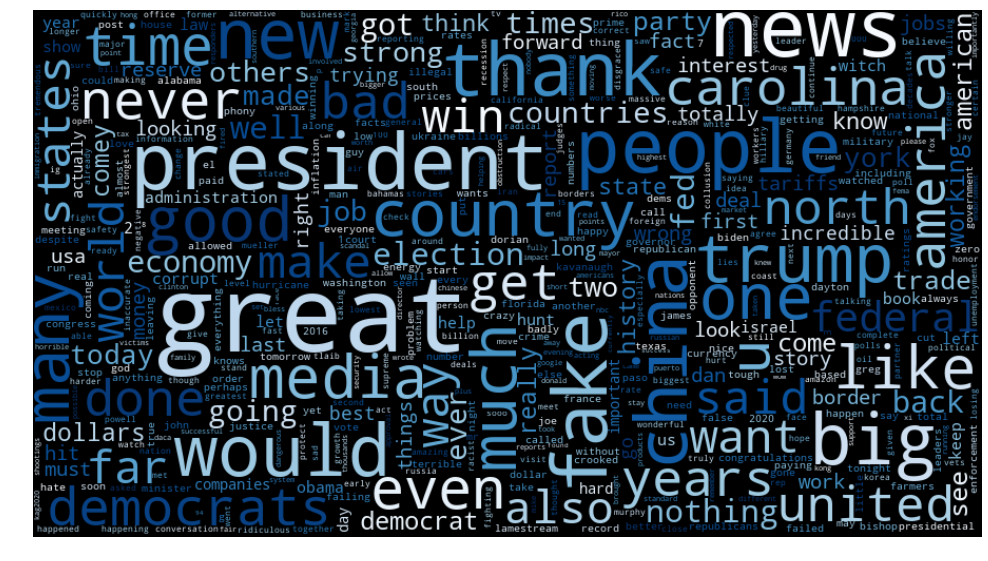

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

words_count = Counter(list(itertools.chain(*tweets_processed)))

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(words_count)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Import Training Dataset

In [157]:
data_train = pd.read_csv('train_data/training.1600000.processed.noemoticon.csv', 
                    encoding="ISO-8859-1", 
                    error_bad_lines=False
                   )
data_train.columns = ['label', 'id', 'created_at', 'source', 'name', 'text']
data_train = data_train.drop(['id','created_at', 'source', 'name'], axis=1)
data_train.head(5)

In [ ]:
# check the number of positive vs. negative tagged sentences
positives = data['label'][data.label == 0]
negatives = data['label'][data.label == 1]

print('number of positve tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('total length of the data is:            {}'.format(data.shape[0]))